# 6.4 Supervised machine learning: Regression

## This script contains the following points:

1. Install the scikit-learn library

2. Import the libraries with necessary modules from scikit-learn

3. Clean the data

4. Explore the data visually to look for variables whose relationship I’d like to test

5. State the hypothesis

6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

7. Split the data into two sets: a training set and a test set

8. Run a linear regression on the data

9. Create a plot that shows the regression line on the test set

10. Write interpretation of how well the line appears to fit the data in a markdown cell

11. Check the model performance statistics—MSE and R2 score

12. Compare the predicted y values with the actual y values in a dataframe

13. Include thoughts on how well the model performed on the test set

## 1. Install the scikit-learn library

## 2. Import the libraries with necessary modules from scikit-learn

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 3. Clean the data

In [7]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [8]:
# Import dataset

path = r'C:\Users\admin\08-2024 Open-Sourced Data Analysis'
df = pd.read_csv(os.path.join(path, 'Data', 'health_cleaned.csv'), encoding='unicode_escape', index_col = False)

In [9]:
df.head()

,location,year_start,year_end,cog_decline,assistance_cog_decline,subj_cog_decline_more,subj_cog_decline_report,mental_distress,lifetime_depression,2_more_fruits,3_more_fruits,non_physical,obesity,sufficient_sleep,subj_bad_health,subj_good_health,high_blood_press_med,high_blood_press,drinking_30_days,smoking
0,Alabama,2015.0,2015.0,48.3,41.7,12.8,45.5,12.4,23.0,18.2,10.6,37.3,36.2,NaN,30.0,70.0,90.7,60.6,6.6,17.3
1,Alabama,2016.0,2016.0,NaN,NaN,NaN,NaN,12.8,22.6,NaN,NaN,36.3,36.0,65.4,30.6,69.4,NaN,NaN,7.6,18.0
2,Alabama,2017.0,2017.0,NaN,NaN,NaN,NaN,13.3,23.3,24.1,11.1,38.9,36.7,NaN,33.0,67.0,90.6,61.8,6.9,16.7
3,Alabama,2018.0,2018.0,NaN,NaN,NaN,NaN,14.0,24.0,NaN,NaN,36.6,37.3,65.0,31.2,68.8,NaN,NaN,6.8,16.4
4,Alabama,2019.0,2019.0,45.1,38.7,14.7,45.2,13.4,22.0,28.3,11.6,36.4,36.7,NaN,31.1,68.9,90.6,62.6,6.9,17.2


In [10]:
# Check for duplicates

dups = df.duplicated()
dups.shape 

(520,)

No duplicates found

In [12]:
# Check for mixed types

for col in df.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print(col)

No mixed types found

In [14]:
# Check for missing values

df.isnull().sum()

location                     0
year_start                   1
year_end                     1
cog_decline                266
assistance_cog_decline     266
subj_cog_decline_more      266
subj_cog_decline_report    266
mental_distress             56
lifetime_depression         56
2_more_fruits              288
3_more_fruits              288
non_physical                54
obesity                     54
sufficient_sleep           285
subj_bad_health             54
subj_good_health            54
high_blood_press_med       288
high_blood_press           288
drinking_30_days            54
smoking                     56
dtype: int64

In [15]:
df_clean = df[df['non_physical'].isnull() == False]

In [16]:
df_clean_2 = df_clean[df_clean['cog_decline'].isnull() == False]

Several values are missing. I deleted the mssing values of the variables I want to analyze as performing linear regression in Python (sklearn.linear_model) doesn't allow having missing values. (Source: https://scikit-learn.org/stable/modules/impute.html)

C:\Users\admin\AppData\Local\Temp\ipykernel_21796\1446909789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cog_decline'], bins=25)


<Axes: xlabel='cog_decline', ylabel='Density'>

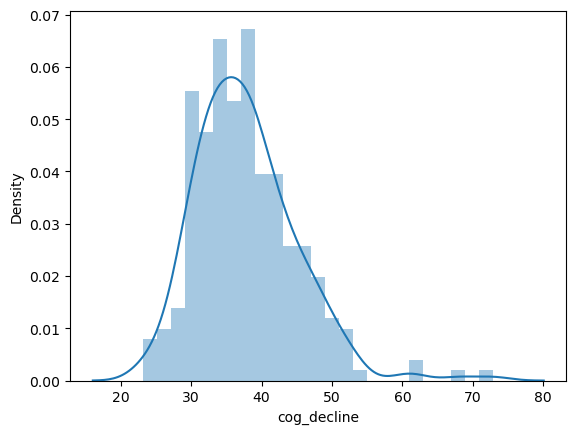

In [78]:
# Check for extreme values

sns.distplot(df['cog_decline'], bins=25) 

As the sample number is not big and the variable numbers in the plot still make sense (not impossible), I think the extreme values here represent natural variations in the population, and they should be left as is in the dataset.

## 4. Explore the data visually to look for variables whose relationship I’d like to test

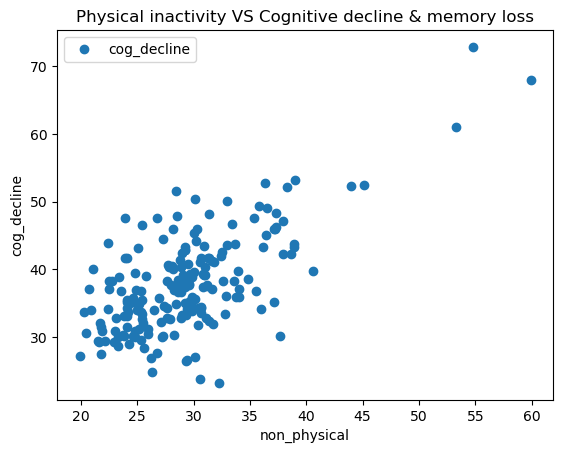

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean_2.plot(x = 'non_physical', y = 'cog_decline', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Physical inactivity VS Cognitive decline & memory loss')  
plt.xlabel('non_physical')  
plt.ylabel('cog_decline')
plt.show()

## 5. State the hypothesis

I would likt to test the hypothesis I made previously: "Older adults who are physically inactive are more likely to report cognitive decline than those who engage in regular physical activity."

## 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable


In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_clean_2['non_physical'].values.reshape(-1,1)
y = df_clean_2['cog_decline'].values.reshape(-1,1)

In [25]:
X

array([[37.3       ],
       [36.4       ],
       [23.7       ],
       [25.5       ],
       [26.9       ],
       [27.6       ],
       [29.4       ],
       [38.9       ],
       [37.3       ],
       [20.9       ],
       [23.4       ],
       [24.8       ],
       [20.3       ],
       [19.9       ],
       [25.3       ],
       [24.2       ],
       [26.5       ],
       [31.2       ],
       [28.3       ],
       [23.9       ],
       [23.        ],
       [23.9       ],
       [22.4       ],
       [30.3       ],
       [28.4       ],
       [28.6       ],
       [31.6       ],
       [37.1       ],
       [33.7       ],
       [31.2       ],
       [24.1       ],
       [25.1       ],
       [23.1       ],
       [22.8       ],
       [25.4       ],
       [25.4       ],
       [26.        ],
       [30.6       ],
       [30.1       ],
       [33.8       ],
       [34.        ],
       [33.6       ],
       [30.6       ],
       [30.1       ],
       [31.4       ],
       [28

In [26]:
y

array([[48.3       ],
       [45.1       ],
       [30.2       ],
       [32.        ],
       [35.8       ],
       [38.2       ],
       [26.6       ],
       [43.7       ],
       [46.2       ],
       [33.9       ],
       [38.8       ],
       [39.4       ],
       [33.7       ],
       [27.2       ],
       [36.8       ],
       [33.6       ],
       [34.        ],
       [37.5       ],
       [30.3       ],
       [41.6       ],
       [30.9       ],
       [47.5       ],
       [43.9       ],
       [46.        ],
       [34.9       ],
       [37.5       ],
       [41.2       ],
       [35.2       ],
       [43.7       ],
       [37.7       ],
       [41.6       ],
       [43.1       ],
       [32.8       ],
       [38.3       ],
       [33.3       ],
       [35.4       ],
       [30.4       ],
       [41.        ],
       [50.4       ],
       [35.9       ],
       [37.        ],
       [38.2       ],
       [23.7       ],
       [27.        ],
       [32.3       ],
       [36

## 7. Split the data into two sets: a training set and a test set


In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

## 8. Run a linear regression on the datat.

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 9. Create a plot that shows the regression line on the test set


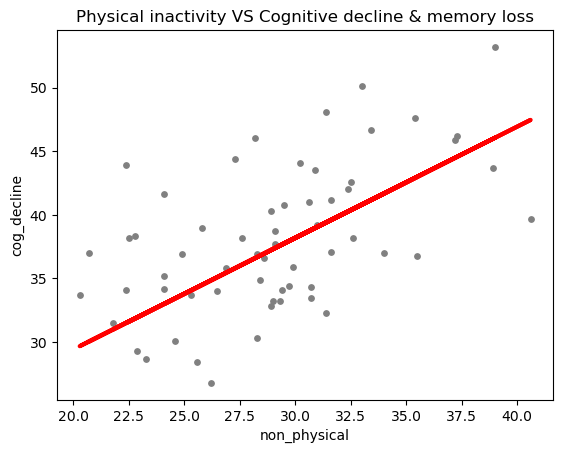

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Physical inactivity VS Cognitive decline & memory loss')
plot_test.xlabel('non_physical')
plot_test.ylabel('cog_decline')
plot_test.show()

## 10. Write interpretation of how well the line appears to fit the data in a markdown cell

The linear model represented by the red regression line doesn’t perfectly cover all of the data points. Some of the points are very close to the line while some are far away from the line. The plot shows that the regression relationship between not being physically active and cognitive decline & memory loss is not very strong, but still somehow positive.



## 11. Check the model performance statistics—MSE and R2 score


In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.87581356]]
Mean squared error:  24.093067880479232
R2 score:  0.2527618173612006


## 12. Compare the predicted y values with the actual y values in a dataframe

In [41]:
y_predicted

array([[36.68272925],
       [30.9899411 ],
       [39.57291401],
       [40.27356486],
       [33.44221907],
       [30.02654618],
       [36.06965976],
       [38.95984452],
       [29.67622075],
       [34.49319535],
       [37.90886824],
       [31.60301059],
       [34.05528857],
       [42.90100555],
       [44.47746996],
       [45.96635302],
       [31.86575466],
       [31.95333602],
       [38.69710045],
       [37.3833801 ],
       [31.51542923],
       [40.36114622],
       [36.68272925],
       [40.799053  ],
       [37.29579875],
       [47.45523608],
       [37.64612417],
       [33.00431229],
       [46.05393438],
       [39.3977513 ],
       [35.10626484],
       [37.20821739],
       [39.04742587],
       [37.73370553],
       [31.51542923],
       [32.30366144],
       [34.84352077],
       [35.45659027],
       [33.70496314],
       [35.80691569],
       [38.78468181],
       [37.20821739],
       [39.57291401],
       [37.3833801 ],
       [36.94547332],
       [38

In [86]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(30)

,Actual,Predicted
0,30.3,36.682729
1,31.5,30.989941
2,37.1,39.572914
3,42.0,40.273565
4,30.1,33.442219
5,37.0,30.026546
6,38.2,36.069660
7,43.5,38.959845
8,33.7,29.676221
9,39.0,34.493195


## 13. Include thoughts on how well the model performed on the test set.

The regression is moderately strong to predict cognitive decline based on physical inactivity. In general, it can be useful for identifying a broad trend but may not be reliable for precise predictions in individual cases. In addition, the data could be biased as it is difficult to get accurate data of percentage number and some state's data is missing.

This analysis tested the hypothesis that older adults who are physically inactive are indeed more likely to experience cognitive decline. According to the regression line, data points, and the positive r-squared, the test result aligns with the hypothesis. However, the relationship appears to be moderate, I think it could be further hypothesized that there could be some other variables also contribute to cognitive decline.